# Eta_max - learning rate max
# Epoch - 총 epoch
# Dec - 0에 가까울 수록 cosine 함수형태 exponential 함수의 성질이 사라짐, Dec 값이 커질수록 exponetial 함수 형태가 살아난다. ex) 0.01, 0.2, 2.0, 5.0 실험!
# T_max - cosine 함수의 주기를 결정, T_max 를 50, 200, 400 테스트

7.999366551149648


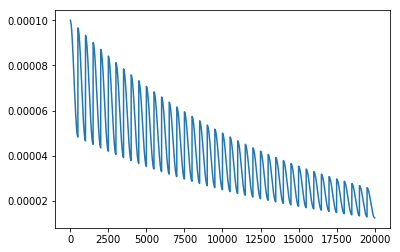

In [56]:
import math
import matplotlib.pyplot as plt
import numpy as np

epoch= 20000
T_max=500
eta_max=1e-4
eta_min=5e-5
dec = 2.

decay= epoch/dec

x1=1.
x2=1.-(2.*eta_min)/(eta_max+eta_min)
x3=x1+x2

res=[]
for i in range(epoch):

    x=eta_max/(x3)*(x1-x2*(np.cos(math.pi * np.mod(i,T_max) / (T_max) +np.pi))) * np.power(0.5,i/decay)
    res.append(x)

plt.plot(res)
#plt.xlim(-1,500)
print(res[0]/res[-1])

In [12]:
import math
from keras.callbacks import Callback

class LearningRateScheduler(Callback):
    """LearningRateScheduler"""
    
    def __init__(self, T_max, eta_max, eta_min, decay=10000,verbose=0):
        super(LearningRateScheduler, self).__init__()
        self.T_max = T_max
        self.eta_max = eta_max
        self.eta_min = eta_min
        self.decay = decay
        self.verbose = verbose
        
    def on_epoch_begin(self, epoch, logs=None):
        if not hasattr(self.model.optimizer, 'lr'):
            raise ValueError('Optimizer must have a "lr" attribute.')

        x1=1.
        x2=1.-(2.*self.eta_min)/(self.eta_max+self.eta_min)
        x3=x1+x2
        
        lr=self.eta_max/(x3)*(x1-x2*(np.cos(math.pi * np.mod(epoch,self.T_max) / (self.T_max) +np.pi))) * np.power(0.5,epoch/self.decay)

        K.set_value(self.model.optimizer.lr, lr)
        if self.verbose > 0:
            print('\nEpoch %05d: LearningRateSchedule setting learning '
                  'rate to %s.' % (epoch + 1, lr))

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs['lr'] = K.get_value(self.model.optimizer.lr)

In [26]:
T_max=500
eta_max=5e-4
eta_min=1e-4
total_epoch=5000
dec=2
decay=total_epoch/dec

In [27]:
learning_scheduler = LearningRateScheduler(T_max=T_max, eta_max=eta_max, eta_min=eta_min, decay=decay, verbose=1)

models.fit( callbacks=[ learning_scheduler ] ) 